In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>


False

In [8]:
 df=pd.read_csv('moradabad.csv')

In [6]:
df=df[df['content'].str.len()>200]

In [9]:
df

,Unnamed: 0,date,content
0,0,2022-10-30 13:38:49+00:00,@faf1307 🇮🇳bowling attack is 🔥🔥#INDvsSA
1,1,2022-10-29 20:52:26+00:00,What a game of football is two teams in relega...
2,2,2022-10-27 16:37:03+00:00,Attack on Shiraz Shrine kills at least 15\nAl ...
3,3,2022-10-27 11:29:24+00:00,15 killed in Shiraz shrine attack\nAt least 15...
4,4,2022-10-25 13:29:56+00:00,#Gujrat: \nपुलिस टीम पर फेंका पेट्रोल बम...#गु...
...,...,...,...
217,217,2013-08-16 02:23:33+00:00,My #ClashOfClans Videos\nMy Attack log http://...
218,218,2012-12-19 18:12:01+00:00,"@LukeSlats if I were an Indian selector, I wou..."
219,219,2012-06-05 04:57:30+00:00,We don't believe in rheumatism and true love u...
220,220,2012-04-17 12:32:13+00:00,@ImZaheer although m a #pwi supporter but wish...


In [10]:
 df=df.drop('Unnamed: 0',axis=1)

In [11]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)

In [36]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df['clean']=df['content'].apply(preprocess_text);

In [13]:
from textblob import TextBlob
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] = tweet['clean'].apply(getSubjectivity)
 tweet['TextBlob_Polarity'] = tweet['clean'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

dfnew=sentiment_analysis(df)

In [14]:
dfnew

,date,content,clean,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,2022-10-30 13:38:49+00:00,@faf1307 🇮🇳bowling attack is 🔥🔥#INDvsSA,faf1307 🇮🇳bowl attack 🔥🔥indvssa,0.000000,0.000000,Neutral
1,2022-10-29 20:52:26+00:00,What a game of football is two teams in relega...,game footbal two team releg zone best team bes...,0.316667,0.766667,Positive
2,2022-10-27 16:37:03+00:00,Attack on Shiraz Shrine kills at least 15\nAl ...,attack shiraz shrine kill least 15 al ajal ya ...,0.400000,-0.300000,Negative
3,2022-10-27 11:29:24+00:00,15 killed in Shiraz shrine attack\nAt least 15...,15 kill shiraz shrine attack least 15 peopl ki...,0.200000,-0.150000,Negative
4,2022-10-25 13:29:56+00:00,#Gujrat: \nपुलिस टीम पर फेंका पेट्रोल बम...#गु...,gujrat पुलिस टीम पर फेंका पेट्रोल बमगुजरात के ...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
217,2013-08-16 02:23:33+00:00,My #ClashOfClans Videos\nMy Attack log http://...,clashofclan video attack log defenc log jorgey...,0.000000,0.000000,Neutral
218,2012-12-19 18:12:01+00:00,"@LukeSlats if I were an Indian selector, I wou...",lukeslat indian selector would fire sachin bri...,0.500000,0.400000,Positive
219,2012-06-05 04:57:30+00:00,We don't believe in rheumatism and true love u...,dont believ rheumat true love first attack,0.527778,0.366667,Positive
220,2012-04-17 12:32:13+00:00,@ImZaheer although m a #pwi supporter but wish...,imzah although pwi support wish see great bowl...,0.675000,0.750000,Positive


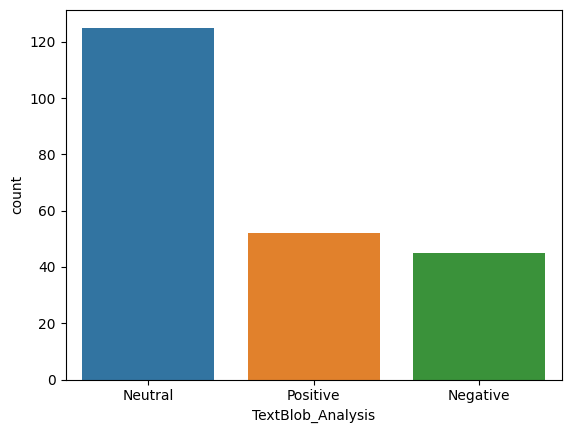

In [15]:
sns.countplot(x=dfnew.TextBlob_Analysis)
plt.show()

In [16]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

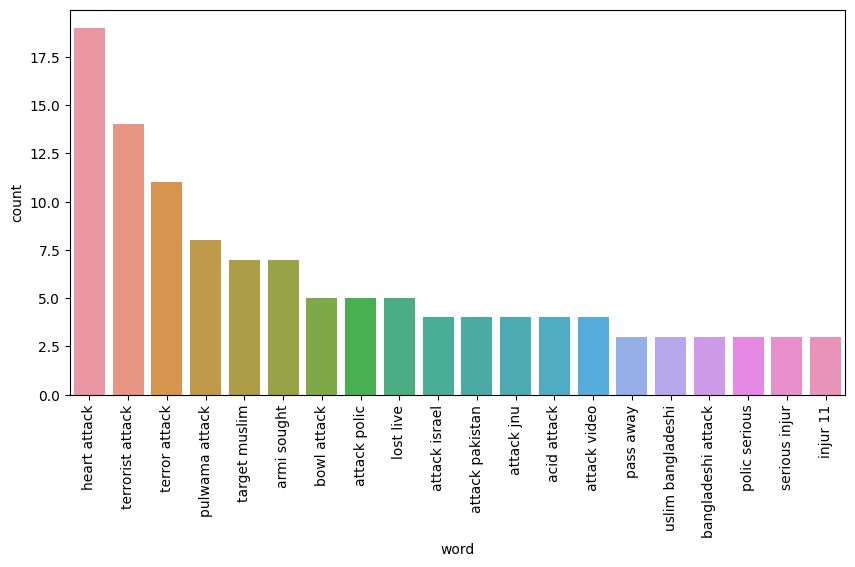

,word,count
0,heart attack,19
1,terrorist attack,14
2,terror attack,11
3,pulwama attack,8
4,target muslim,7
5,armi sought,7
6,bowl attack,5
7,attack polic,5
8,lost live,5
9,attack israel,4


In [19]:
get_n_grams(df.clean,2,2,20)